In [1]:
!ls /Users/coco/Downloads/Dataset22

Test  Train


In [1]:
#Class to load the dataset images from drivce
import os
import cv2
import numpy as np


class SimpleDatasetLoader:
    # Method: Constructor
    def __init__(self, preprocessors=None):
        """
        :param preprocessors: List of image preprocessors
        """
        self.preprocessors = preprocessors

        if self.preprocessors is None:
            self.preprocessors = []

    # Method: Used to load a list of images for pre-processing
    def load(self, image_paths, verbose=-1):
        """
        :param image_paths: List of image paths
        :param verbose: Parameter for printing information to console
        :return: Tuple of data and labels
        """
        data, labels = [], []

        for i, image_path in enumerate(image_paths):
            image = cv2.imread(image_path)
            label = image_path.split(os.path.sep)[-2]

            if self.preprocessors is not None:
                for p in self.preprocessors:
                    image = p.preprocess(image)

            data.append(image)
            labels.append(label)

            if verbose > 0 and i > 0 and (i+1) % verbose == 0:
                print('[INFO]: Processed {}/{}'.format(i+1, len(image_paths)))

        return (np.array(data), np.array(labels))

In [3]:
#Class Preprocessror 
class SimplePreprocessor:
    # Method: Constructor
    def __init__(self, width, height, interpolation=cv2.INTER_AREA):
        """
        :param width: Image width
        :param height: Image height
        :param interpolation: Interpolation algorithm
        """
        self.width = width
        self.height = height
        self.interpolation = interpolation

    # Method: Used to resize the image to a fixed size (ignoring the aspect ratio)
    def preprocess(self, image):
        """
        :param image: Image
        :return: Re-sized image
        """
        return cv2.resize(image, (self.width, self.height), interpolation=self.interpolation)

[INFO]: Images loading....
[INFO]: Processed 500/12036
[INFO]: Processed 1000/12036
[INFO]: Processed 1500/12036
[INFO]: Processed 2000/12036
[INFO]: Processed 2500/12036
[INFO]: Processed 3000/12036
[INFO]: Processed 3500/12036
[INFO]: Processed 4000/12036
[INFO]: Processed 4500/12036
[INFO]: Processed 5000/12036
[INFO]: Processed 5500/12036
[INFO]: Processed 6000/12036
[INFO]: Processed 6500/12036
[INFO]: Processed 7000/12036
[INFO]: Processed 7500/12036
[INFO]: Processed 8000/12036
[INFO]: Processed 8500/12036
[INFO]: Processed 9000/12036
[INFO]: Processed 9500/12036
[INFO]: Processed 10000/12036
[INFO]: Processed 10500/12036
[INFO]: Processed 11000/12036
[INFO]: Processed 11500/12036
[INFO]: Processed 12000/12036
[INFO]: Features Matrix: 36108000.0MB
[INFO]: Classification starting....
              precision    recall  f1-score   support

        Fake       0.67      0.64      0.66      1483
        Real       0.67      0.69      0.68      1526

    accuracy                       

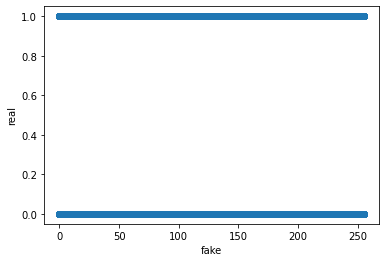

In [8]:
from imutils import paths
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from __main__ import SimplePreprocessor
from __main__ import SimpleDatasetLoader
import numpy as np
import pandas as pd
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Get list of image paths
image_paths = list(paths.list_images("C:/Users/pc/Dataset22"))

# Initialize SimplePreprocessor and SimpleDatasetLoader and load data and labels
print('[INFO]: Images loading....')
sp = SimplePreprocessor(32, 32)
sdl = SimpleDatasetLoader(preprocessors=[sp])
(data, labels) = sdl.load(image_paths, verbose=500)

# Reshape from (3000, 32, 32, 3) to (3000, 32*32*3=3072)
data = data.reshape((data.shape[0], 3072))

# Print information about memory consumption
print('[INFO]: Features Matrix: {:.1f}MB'.format(float(data.nbytes / 1024*1000.0)))

# Encode labels as integers
le = LabelEncoder()
labels = le.fit_transform(labels)

# Split data into training (75%) and testing (25%) data
(train_x, test_x, train_y, test_y) = train_test_split(data, labels, test_size=.3, random_state=42)

# Train and evaluate the k-NN classifier on the raw pixel intensities
print('[INFO]: Classification starting....')
model = KNeighborsClassifier(n_neighbors=7,
                             n_jobs=1)
model.fit(train_x, train_y)

neighbors= np.arange(1,20)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(train_x, train_y)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_x, train_y)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_x, test_y) 

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

print(classification_report(test_y, model.predict(test_x),
                            target_names=le.classes_))

In [9]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np 

model = KNeighborsClassifier(n_neighbors=2,n_jobs=1)
model.fit(train_x, train_y)

accuracy = accuracy_score(model.predict(test_x), test_y)
print(accuracy)
n_neighbors = np.array([7,8,9,10,12,15,20])
param_grid = dict(n_neighbors=n_neighbors)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(train_x, train_y)
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)

0.609172482552343


KeyboardInterrupt: 